# <center> Neural Networks Model </center>

The code uses a training set and test set to develop a neural network model. 
The training set is used to tune the model.



In [1]:

import numpy as np
import pandas as pd
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
import matplotlib.pyplot as plt

digits = pd.read_csv("train.csv")
digitsTest = pd.read_csv("test_nolabel.csv")

digits.head()

2021-12-12 18:56:34.131286: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-12 18:56:34.131336: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


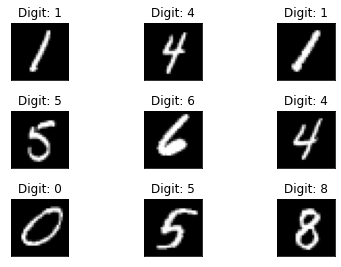

In [2]:
train = digits.values[:,1:]
trainLabels_raw = digits.values[:,0]
test = digitsTest.values[:,:]

## View the top entries as images
fig = plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(train[i].reshape(28,-1),cmap="gray")
    plt.title("Digit: {}".format(trainLabels_raw[i]))
    plt.xticks([])
    plt.yticks([])
plt.show()
plt.close()

In [3]:
# The size of the data
train.shape, trainLabels_raw.shape, test.shape

((6000, 784), (6000,), (1000, 784))

In [4]:
train = train.astype("float32")
train/=255.0
num_categories = 10
trainLabels = keras.utils.np_utils.to_categorical(trainLabels_raw,num_categories)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation = "relu", input_shape = (28,28,1)
))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(num_categories, activation = "softmax"))

#Complie the model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='Adam',
              metrics=['accuracy'])

save=model
# Train the model
batch_size = 128
num_epoch = 3
model_log = model.fit(train.reshape(-1,28,28,1), trainLabels,
          batch_size=batch_size,
          epochs=num_epoch,
          verbose=1,
          )


## Predict the model
ypred = model.predict(test.reshape(-1,28,28,1))

2021-12-12 18:57:11.312129: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-12-12 18:57:11.312195: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-12-12 18:57:11.312266: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (6dbd7ae3af54): /proc/driver/nvidia/version does not exist
2021-12-12 18:57:11.312583: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/3
47/47 [==============================] - 18s 369ms/step - loss: 0.8638 - accuracy: 0.7745
Epoch 2/3
47/47 [==============================] - 18s 383ms/step - loss: 0.2662 - accuracy: 0.9223
Epoch 3/3
47/47 [==============================] - 19s 398ms/step - loss: 0.1627 - accuracy: 0.9532


In [5]:
save.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 10)                92170     
                                                                 
Total params: 110,986
Trainable params: 110,986
Non-trainable params: 0
__________________________________________________

In [6]:
# convert output to numbers and store to csv
ypred_num = []
for y in ypred:
    for i in range(10):
        if y[i] == max(y):
            ypred_num.append(i)

with open('pred.csv', 'w') as file:
    for n in ypred_num:
        file.write("%i\n" % n)

In [7]:
ypred_num

[6,
 2,
 7,
 1,
 7,
 3,
 4,
 3,
 4,
 1,
 0,
 5,
 0,
 2,
 4,
 3,
 8,
 7,
 8,
 9,
 1,
 7,
 1,
 7,
 7,
 0,
 5,
 4,
 7,
 5,
 3,
 4,
 8,
 7,
 0,
 5,
 8,
 4,
 7,
 6,
 8,
 8,
 0,
 9,
 7,
 2,
 1,
 1,
 6,
 2,
 7,
 3,
 3,
 8,
 9,
 2,
 0,
 9,
 6,
 9,
 1,
 3,
 8,
 2,
 7,
 5,
 1,
 1,
 6,
 7,
 0,
 6,
 8,
 0,
 8,
 7,
 1,
 9,
 7,
 7,
 8,
 2,
 7,
 1,
 1,
 1,
 3,
 8,
 6,
 3,
 9,
 3,
 4,
 5,
 8,
 2,
 8,
 3,
 7,
 1,
 7,
 9,
 8,
 9,
 2,
 4,
 6,
 5,
 4,
 0,
 6,
 1,
 0,
 1,
 0,
 4,
 3,
 7,
 7,
 5,
 3,
 6,
 9,
 6,
 5,
 0,
 2,
 9,
 7,
 0,
 5,
 7,
 2,
 1,
 8,
 9,
 5,
 7,
 8,
 9,
 6,
 1,
 9,
 3,
 1,
 9,
 4,
 4,
 1,
 2,
 8,
 3,
 6,
 2,
 8,
 4,
 9,
 2,
 3,
 2,
 2,
 2,
 9,
 8,
 0,
 3,
 0,
 8,
 4,
 4,
 7,
 4,
 3,
 8,
 6,
 3,
 6,
 5,
 8,
 8,
 4,
 9,
 6,
 1,
 0,
 9,
 4,
 8,
 7,
 2,
 9,
 9,
 1,
 3,
 1,
 9,
 4,
 6,
 9,
 3,
 4,
 6,
 2,
 3,
 8,
 6,
 8,
 3,
 4,
 6,
 6,
 2,
 8,
 0,
 1,
 5,
 7,
 9,
 3,
 9,
 8,
 1,
 2,
 4,
 2,
 7,
 9,
 2,
 4,
 8,
 4,
 8,
 7,
 0,
 7,
 8,
 7,
 7,
 6,
 6,
 1,
 1,
 4,
 4,
 4,
 1,
 9,
 6,
 0,
 0,


In [8]:
from tensorflow.keras.optimizers import SGD
train = digits.values[:,1:]
trainLabels_raw = digits.values[:,0]
test = digitsTest.values[:,:]
train = train.astype("float32")
train/=255.0
num_categories = 10
trainLabels = keras.utils.np_utils.to_categorical(trainLabels_raw,num_categories)

str_a='relu'
str_m= 'softmax'
str_c='categorical_crossentropy'
acc= 'accuracy'

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1), activation= str_a))
model.add(Conv2D(64, (6, 6), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation= str_a))
model.add(Dense(64, activation=str_a))
model.add(Dense(num_categories, activation=str_m))
sgd = SGD(lr=0.01,decay=1e-6,momentum=0.9,nesterov=True)
model.compile(loss=str_c, optimizer=sgd, metrics=[acc])
curr = model

model_log = model.fit( train.reshape(-1,28,28,1), trainLabels,validation_split=0.33, epochs= 20, batch_size= 128)
ypred= model.predict(test.reshape(-1,28,28,1))

/opt/conda/lib/python3.9/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/20
32/32 [==============================] - 34s 1s/step - loss: 2.0380 - accuracy: 0.3548 - val_loss: 0.9484 - val_accuracy: 0.6896
Epoch 2/20
32/32 [==============================] - 33s 1s/step - loss: 0.7763 - accuracy: 0.7773 - val_loss: 0.4162 - val_accuracy: 0.8698
Epoch 3/20
32/32 [==============================] - 33s 1s/step - loss: 0.3878 - accuracy: 0.8868 - val_loss: 0.3167 - val_accuracy: 0.8985
Epoch 4/20
32/32 [==============================] - 33s 1s/step - loss: 0.2839 - accuracy: 0.9154 - val_loss: 0.2805 - val_accuracy: 0.9127
Epoch 5/20
32/32 [==============================] - 33s 1s/step - loss: 0.2238 - accuracy: 0.9313 - val_loss: 0.2286 - val_accuracy: 0.9298
Epoch 6/20
32/32 [==============================] - 33s 1s/step - loss: 0.1813 - accuracy: 0.9468 - val_loss: 0.1932 - val_accuracy: 0.9430
Epoch 7/20
32/32 [==============================] - 34s 1s/step - loss: 0.1483 - accuracy: 0.9547 - val_loss: 0.1960 - val_accuracy: 0.9460
Epoch 8/20
32/32 [==

In [9]:
ypred_num = []
for y in ypred:
    for i in range(10):
        if y[i] == max(y):
            ypred_num.append(i)

with open('pred.csv', 'w') as file:
    for n in ypred_num:
        file.write("%i\n" % n)
        
ypred_num


[6,
 2,
 7,
 1,
 7,
 3,
 4,
 3,
 4,
 1,
 0,
 5,
 0,
 2,
 4,
 3,
 8,
 7,
 8,
 9,
 1,
 7,
 1,
 7,
 7,
 0,
 5,
 4,
 7,
 5,
 3,
 4,
 2,
 7,
 0,
 5,
 1,
 4,
 7,
 6,
 9,
 8,
 0,
 4,
 7,
 2,
 1,
 1,
 6,
 2,
 7,
 3,
 3,
 8,
 9,
 2,
 0,
 9,
 6,
 9,
 1,
 3,
 8,
 2,
 7,
 5,
 1,
 1,
 6,
 7,
 0,
 6,
 8,
 0,
 8,
 7,
 1,
 9,
 7,
 7,
 8,
 2,
 7,
 1,
 1,
 1,
 3,
 8,
 6,
 3,
 9,
 3,
 4,
 5,
 8,
 2,
 8,
 3,
 7,
 1,
 7,
 9,
 8,
 9,
 2,
 4,
 6,
 5,
 4,
 0,
 6,
 1,
 0,
 1,
 0,
 4,
 3,
 7,
 7,
 5,
 3,
 6,
 9,
 6,
 5,
 0,
 2,
 9,
 7,
 0,
 5,
 7,
 2,
 1,
 8,
 9,
 5,
 7,
 8,
 9,
 6,
 1,
 9,
 3,
 1,
 9,
 9,
 4,
 1,
 2,
 8,
 3,
 6,
 2,
 8,
 4,
 9,
 2,
 3,
 2,
 2,
 2,
 9,
 9,
 0,
 3,
 0,
 8,
 4,
 4,
 7,
 4,
 3,
 8,
 6,
 5,
 6,
 5,
 1,
 8,
 4,
 9,
 6,
 1,
 0,
 9,
 4,
 8,
 7,
 2,
 9,
 9,
 1,
 3,
 1,
 9,
 4,
 6,
 9,
 3,
 4,
 6,
 2,
 3,
 1,
 6,
 8,
 3,
 4,
 6,
 6,
 2,
 8,
 0,
 1,
 5,
 7,
 9,
 3,
 9,
 8,
 1,
 2,
 4,
 2,
 7,
 9,
 2,
 4,
 8,
 4,
 9,
 7,
 0,
 7,
 8,
 7,
 7,
 6,
 6,
 1,
 1,
 4,
 4,
 4,
 1,
 9,
 6,
 0,
 0,


In [10]:
curr.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 21, 21, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 10, 10, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 6400)              0         
                                                                 
 dense_1 (Dense)             (None, 128)               819328    
                                                      

Error: no "view" mailcap rules found for type "image/png"
/usr/bin/xdg-open: 869: www-browser: not found
/usr/bin/xdg-open: 869: links2: not found
/usr/bin/xdg-open: 869: elinks: not found
/usr/bin/xdg-open: 869: links: not found
/usr/bin/xdg-open: 869: lynx: not found
/usr/bin/xdg-open: 869: w3m: not found
xdg-open: no method available for opening 'file1.png'


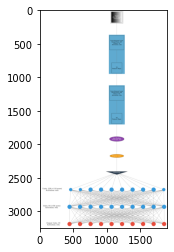

In [12]:
from keras_visualizer import visualizer 
import matplotlib.image as temp
visualizer(curr, filename='file1',format='png', view=True)
file_hold= temp.imread('file1.png')
show1 = plt.imshow(file_hold)
plt.show()
